<a href="https://colab.research.google.com/github/peanutpirate/Week_4_Perfume_Recommender_AI/blob/main/Day_15_16_17_18_Fragrantica_Perfurme_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Proje / Çalışma Başlığı: Fragrantica Koku Seti
## Amaç: Veri Setini Benim Bulduğum Proje
# bu notebookta şunu öğrenmeyi / analiz etmeyi amaçlıyorum: Kendi bulduğum setle deneme

## İçindekiler
# 1. Veri Tanımı
# 2. İlk İnceleme
# 3. Analiz
# 4. Sonuç Yorum

## Veri Tanımı: Fragrantica Koku Seti
# Bu çalışmada kullanılan veri:
# - Kaynak: Kaggle
# - Satır sayısı: 8710
# - Değişkenler:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku (dosya adını kendi dosyanıza göre güncelleyin)
# df = pd.read_csv('/content/fra_cleaned.csv')
#"Kod hata verdi fransızca veriler olduğu içinmiş yenisini deniyoruz"
#df = pd.read_csv('/content/fra_cleaned.csv', encoding='latin-1') bu da olmadı
#df = pd.read_csv('/content/fra_cleaned.csv', encoding='ISO-8859-1') hatalı veri olduğu için bu olmadı yenisi
import pandas as pd

# on_bad_lines='skip' parametresi, sorunlu satırları atlayıp geri kalanını yükler.
df = pd.read_csv('/content/fra_cleaned.csv',
                 encoding='latin-1',
                 on_bad_lines='skip')

print(f"Başarıyla yüklenen satır sayısı: {len(df)}")
print(df.head())


Başarıyla yüklenen satır sayısı: 8710
                                                                                                                                                                                                                 url;Perfume;Brand;Country;Gender;Rating Value;Rating Count;Year;Top;Middle;Base;Perfumer1;Perfumer2;mainaccord1;mainaccord2;mainaccord3;mainaccord4;mainaccord5
https://www.fragrantica.com/perfume/xerjoff/acc... 42;201;2022;fruity notes aldehydes               green notes;bulgarian rose  egyptian jasmine                                   lily-of-the-valley;eucalyptus    pine;unknown;;rose;woody;fruity;aromatic;floral                                                                                                             
https://www.fragrantica.com/perfume/jean-paul-g... 86;70;2024;yuzu          citruses;orange blossom neroli;musk                 blonde woods;unknown;;citrus;white floral;sweet... NaN                                          

In [ ]:
#EDA'ya Dönüş Bileti
#Hata düzeldiği anda verinin içine sızmak için şu iki komutu hemen çalıştırın ki "pil bitmeden" en azından neyle karşı karşıya olduğunuzu görün:

#df.columns: Bakalım elimizde hangi "malzemeler" (sütunlar) var?
df.columns


Index(['url;Perfume;Brand;Country;Gender;Rating Value;Rating Count;Year;Top;Middle;Base;Perfumer1;Perfumer2;mainaccord1;mainaccord2;mainaccord3;mainaccord4;mainaccord5'], dtype='object')

In [ ]:
#df.sample(5): Rastgele 5 parfüm seçip verinin temizlik durumuna bakalım.
df.sample(5)

,,,,,,url;Perfume;Brand;Country;Gender;Rating Value;Rating Count;Year;Top;Middle;Base;Perfumer1;Perfumer2;mainaccord1;mainaccord2;mainaccord3;mainaccord4;mainaccord5
https://www.fragrantica.com/perfume/so/so-eternal-8048.html;so-eternal;so;UK;women;4,16;57;;clementine,amalfi lemon;violet,orchid,pink peony;amber,vanille,sandalwood;unknown;;powdery;citrus;floral;amb...
https://www.fragrantica.com/perfume/prada/mirages-soleil-au-zenith-44124.html;mirages-soleil-au-zenith;prada;Italy;unisex;4,54;140;2017;peach,ylang-ylang;sandalwood;nutmeg,cinnamon,vanilla,pimento,cumin;unknown;;warm spicy;woody;fresh spicy;s...
https://www.fragrantica.com/perfume/maison-francis-kurkdjian/aqua-media-cologne-forte-82030.html;aqua-media-cologne-forte;maison-francis-kurkdjian;France;unisex;3,81;774;2023;verbena,bergamot;fennel,hedione;matcha tea,musk,woodsy notes;francis kurkdjian;;citrus;green;fresh;soft spicy;powdery,NaN
https://www.fragrantica.com/perfume/kenzo/flower-by-kenzo-summer-2008-2927.html;flower-by-kenzo-summer-2008;kenzo;France;women;3,16;88;2008;ginger,mandarin orange,litchi;freesia,parma violet;white musk,incense;alberto morillas;;floral;warm spicy;citrus;violet;powdery,NaN
https://www.fragrantica.com/perfume/coty/smitty-16974.html;smitty;coty;USA;women;4,38;48;1976;green notes,citruses;floral notes;oakmoss,woody notes;unknown;;mossy;green;woody;floral;earthy,NaN,NaN,NaN


In [ ]:
#Analiz ve Alternatif (Nükleer Seçenek)
#Eğer yukarıdaki kod çalışırsa, kaç satırı kaybettiğimize bakacağız. Eğer çok fazla satır silindiyse, verinin ayırıcı (separator) karakterini kontrol etmeliyiz. Bazen dosyalar virgül (,) yerine noktalı virgül (;) ile ayrılmış olabilir.

#Eğer yine hata alırsanız şunu deneyin:
# Data Pre-processing (Veri Ön İşleme) aşamasının en sancılı ama en öğretici kısmındayız. Kirli veriyle savaşmak, model kurmaktan daha çok vakit alır ama gerçek veri bilimciliği budur.

#WWA Notu: Bu engeli aştığımızda, kaç sütunumuz olduğunu ve o 7 sütunun başlıklarını bana yazın. Gerçekten Fragrantica'nın o karmaşık dünyasına girmeye çok yaklaştık!

# Pilin bitmek üzere olduğunu biliyorum, bu son denememiz olsun; tablo gelirse zaferle günü kapatırız! 🏆🧪
df = pd.read_csv('/content/fra_cleaned.csv', sep=None, engine='python', encoding='latin-1')

In [ ]:
#Şu an karmaşık gelmesi çok normal çünkü Fragrantica verisi genellikle unstructured (yapılandırılmamış) metinler içerir.

#🧠 Stratejik Sadeleştirme: Karmaşayı Nasıl Çözeriz?
#Veriyi evcilleştirmek için şu 3 adımı uygulayalım:

#1. Sütun İsimlerini Türkçeleştirelim/Sadeleştirelim: Hangi sütunlar geldi? Muhtemelen şuna benzer şeyler görüyorsunuz: brand, title, gender, accords, top_notes, middle_notes, base_notes. Sadece en önemli 4-5 tanesini seçip geri kalanını şimdilik "görmezden gelmek" zihinsel yükünüzü %80 azaltır.

#2. Veriden Küçük Bir Kesit Alın (Sample): Binlerce satıra bakmak yerine sadece 3 satıra odaklanın:
# Sadece seçtiğimiz önemli sütunlara bakalım
# (Sütun isimlerini kendi verinizdekilerle değiştirin)
important_cols = ['Perfume', 'Brand', 'Country', 'Gender']
print(df[important_cols].sample(3))

                          Perfume     Brand Country Gender
14372  shalimar-souffle-de-parfum  guerlain  France  women
8529                chanson-d-eau      coty     USA  women
6405                         navy      dana     USA  women


In [ ]:
#Hah! İşte şimdi düğümü çözdük. Sorun şu: Senin veri setin aslında "virgül" (,) ile değil, "noktalı virgül" (;) ile ayrılmış. Python hepsini tek bir sütun ismi zannettiği için sana tek bir satırda kocaman bir liste verdi.

#Bu yüzden az önce 7 sütun beklerken 8 bulup hata vermişti. Veri setin aslında "Semicolon Separated" bir dosya.

#🛠️ Stratejik Müdahale: Tek Satırla Her Şeyi Düzelten Kod
#Pili tamamen bitirmeden şu kodu çalıştır, tablonun bir anda çiçek gibi açıldığını göreceksin:
import pandas as pd

# sep=';' parametresi sihirli değneğimizdir.
df = pd.read_csv('/content/fra_perfumes.csv',
                 sep=';',
                 encoding='latin-1',
                 on_bad_lines='skip')

# Şimdi bak bakalım malzemelere
print(f"Toplam Parfüm Sayısı: {len(df)}")
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/fra_perfumes.csv'

In [ ]:
#🔍 Yeni "Malzeme" Listemiz (Sütunlar)
#Şimdi elinde çok daha profesyonel bir yapı var:

#Top / Middle / Base: Parfümün koku piramidi! (Gerçek hazine burada).

#Mainaccord1...5: Parfümü tanımlayan ana karakterler.

#Rating Value / Rating Count: Popülerlik analizi için altın veri.

#Year: Zaman içindeki koku trendleri.

In [ ]:
## Sonuç & Öğrendiklerim:
# - Bugün şunu öğrendim: kategoriler , ile mi ayrılmış yoksa ; mı önem arz ediyor ona göre kategorileri daha rahat görebiliriz.
# - Bu kısım zorladı: Unstructured bir database ile çalışmak
# - Bir dahaki sefere şunu eklemek isterim: Unstructured data ile çalışmadan önceki adımlar

# - Çalışma logu: 12 40 da başladım
# -Süre: 60 dk
# -Tarih: 27.01.2026
# -Ruh hali: Yorgun ama Kendine Gelme Hali
# -1 küçük zafer: evet 3. haftaya geldik inanabiliyormusun aslında 4. ama ilk hafta öğrenme modu açık değildi. :)


In [ ]:
## Chi-square Test
#Bugün ajandamızda Chi-Square (Ki-Kare) testi var. Amacımız; parfüm dünyasındaki o meşhur "kadın kokusu / erkek kokusu" ayrımının istatistiksel olarak ne kadar gerçek olduğunu kanıtlamak.
# 1. Adım: Veriyi Hazırlama
#Dün en son sep=';' ile veriyi düzgünce içeri almıştık. Şimdi Chi-Square testi yapabilmemiz için Gender ve mainaccord1 (en baskın nota) sütunlarını temizlememiz lazım.
print(df.columns.tolist())
# 1. Önce sütun isimlerindeki gizli boşlukları ve büyük/küçük harf karmaşasını çözelim
df.columns = df.columns.str.strip() # Kenardaki boşlukları siler

# 2. Şimdi listeyi tekrar kontrol et
print("Düzeltilmiş Sütun İsimleri:", df.columns.tolist())

# 3. Eğer sütun isimlerin 'Gender' ve 'mainaccord1' ise şimdi bu kod çalışacaktır:
try:
    df_clean = df.dropna(subset=['Gender', 'mainaccord1'])
    print("Başarıyla temizlendi!")
except KeyError as e:
    print(f"Hala bulamıyorum! Aradığım ama olmayan isimler: {e}")
#Şu kodu çalıştırarak başla:
# Önce eksik verileri temizleyelim ki test hata vermesin
df_clean = df.dropna(subset=['Gender', 'mainaccord1'])

# Cinsiyet ve Ana Nota arasındaki çapraz tabloyu (Contingency Table) kuralım
contingency_table = pd.crosstab(df_clean['Gender'], df_clean['mainaccord1'])

print("Çapraz Tablo (İlk 5 Satır):")
print(contingency_table.head())

In [ ]:
print(df.columns)


In [ ]:
# Sütun isimlerini tamamen temizleyelim
df.columns = [c.strip() for c in df.columns]

# Bakalım gerçekten o isimde sütunlar var mı?
print("Mevcut Sütunlar:", list(df.columns))

# Eğer isimler farklıysa (mesela 'gender' ise), kodu ona göre güncelleyeceğiz.

In [ ]:
import pandas as pd

# 1. Veriyi VİRGÜL (,) ayırıcı ile yeniden okuyoruz
df = pd.read_csv('/content/fra_cleaned.csv', sep=',', encoding='latin-1')

# 2. Sütun isimlerini görelim (Boşlukları temizleyelim)
df.columns = [c.strip() for c in df.columns]
print("Yeni Tertemiz Sütunlarımız:", df.columns.tolist())

# 3. İsim Eşleştirme (Senin sütun isimlerin 'Name' ve 'Main Accords' olmuş)
# Chi-Square için sütun isimlerini güncelleyelim:
try:
    df_clean = df.dropna(subset=['Gender', 'Main Accords'])
    contingency_table = pd.crosstab(df_clean['Gender'], df_clean['Main Accords'])
    print("\n✅ Başardık! Çapraz tablo hazır.")
    print(contingency_table.head())
except KeyError as e:
    print(f"❌ Eyvah, hala bir isim uyuşmazlığı var: {e}")

In [ ]:
import pandas as pd

# on_bad_lines='skip' diyerek kavga çıkaran satırları kapı dışarı ediyoruz
df = pd.read_csv('/content/fra_cleaned.csv', sep=',', encoding='latin-1', on_bad_lines='skip')

# Sütunları temizle
df.columns = [c.strip() for c in df.columns]

print(f"✅ Başardık! Toplam {len(df)} parfüm başarıyla yüklendi.")
print("Sütunların:", df.columns.tolist())

In [ ]:
import pandas as pd

# engine='python' ve sep=None diyerek ayırıcıyı otomatik bulmasını sağlıyoruz
df = pd.read_csv('/content/fra_cleaned.csv', sep=None, engine='python', encoding='latin-1', on_bad_lines='skip')

# Sütun isimlerindeki olası noktalı virgülleri ve boşlukları temizleyelim
if len(df.columns) == 1:
    # Eğer hala tek sütunsa manuel bölelim
    col_name = df.columns[0]
    new_columns = col_name.split(';')
    df[new_columns] = df[col_name].str.split(';', expand=True)
    df = df.drop(columns=[col_name])

# Temizlik
df.columns = [c.strip() for c in df.columns]

print(f"🚀 Toplam {len(df)} parfüm ve {len(df.columns)} sütun hazır!")
print("Yeni Sütun Listesi:", df.columns.tolist())

In [ ]:
# Cinsiyet ve İlk Ana Nota arasındaki ilişki
df_clean = df.dropna(subset=['Gender', 'mainaccord1'])
contingency_table = pd.crosstab(df_clean['Gender'], df_clean['mainaccord1'])

from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Ki-Kare İstatistiği: {chi2}")
print(f"P-Değeri: {p}")

In [ ]:
# En popüler 10 koku notasına bakalım (Tablo çok kalabalık olmasın)
top_accords = df['mainaccord1'].value_counts().nlargest(10).index
df_top = df[df['mainaccord1'].isin(top_accords)]

# Cinsiyet ve Koku arasındaki dağılım
distribution = pd.crosstab(df_top['mainaccord1'], df_top['Gender'])
print("Koku ve Cinsiyet Dağılımı:")
print(distribution)

In [ ]:
# Yıllara göre ortalama parfüm puanları
df['Rating Value'] = pd.to_numeric(df['Rating Value'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

yearly_ratings = df.groupby('Year')['Rating Value'].mean().dropna()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
yearly_ratings.plot(kind='line', marker='o', color='purple')
plt.title("Yıllara Göre Parfüm Kalite (Puan) Değişimi")
plt.ylabel("Ortalama Puan")
plt.grid(True)
plt.show()

In [ ]:
#3. Stratejik Yorumlama (En Önemli Kısım)
#Ekranda çıkan P-Değeri (p-value) bizim kaderimizi belirleyecek:

#P < 0.05 ise: "Dostum, parfümlerin ana notaları ile cinsiyet arasında çok güçlü bir bağ var. Yani 'odunsu' kokuların erkeklere, 'çiçeksi' kokuların kadınlara pazarlanması sadece bir tesadüf değil, veride kemikleşmiş bir gerçek!" diyebilirsin.

#P > 0.05 ise: "Cinsiyet ile koku ailesi arasında anlamlı bir fark yok, her şey birbirine karışmış" demektir.

# 4. Görsel Destek (Isı Haritası)
#Rakamlar bazen sıkıcıdır, bu ilişkiyi bir Heatmap (Isı Haritası) ile görelim. Hangi koku hangi cinsiyette "patlıyor" hemen belli olur:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=False, cmap="YlGnBu")
plt.title("Cinsiyet ve Koku Notaları İlişkisi")
plt.show()

In [ ]:
#Soru: Testi çalıştırdığında P-değeri ne çıktı? Eğer çok küçük bir sayı çıktıysa (örneğin 1.2e-15 gibi), ilk bilimsel bulgunu keşfettin demektir!

# Ne dersin, sonuçlar beklediğin gibi mi yoksa "Unisex" devrimi verileri alt üst mü etmiş? :)
# Vay canına! P-Değeri: 0.0 demek, istatistik dünyasında "mikrofonu bırak ve sahneden in" demektir.
# Bu sonuç bize şunu söylüyor: Cinsiyet ile ana koku notaları arasındaki ilişki o kadar güçlü ki,
# bunun tesadüf olma ihtimali matematiksel olarak sıfıra yakın.
# Yani parfüm endüstrisi, koku ailelerini cinsiyetlere göre çok keskin çizgilerle ayırmış durumda.
# 1. Stratejik Analiz: Bu Rakam Ne Anlatıyor?P-Değeri (0.0): Normalde $p < 0.05$ olması yeterlidir, ama senin sonucun barajın çok ama çok altında.
# Bu, bulgunun "İstatistiksel olarak aşırı anlamlı" olduğunu gösterir.
# Ki-Kare İstatistiği (7853): Bu sayı ne kadar büyükse, "gözlemlenen değerler" ile "beklenen (tesadüfi) değerler" arasındaki fark o kadar devasadır.
# 7800+ rakamı, veride devasa bir kutuplaşma olduğunu kanıtlıyor.

# 2. Görselleştirme Zamanı (Isı Haritası)
# Rakamları gördük, şimdi bu "farkı" gözümüzle görelim.
# Hangi notaların hangi cinsiyette kümelendiğini anlamak için şu kodu çalıştır:
import seaborn as sns
import matplotlib.pyplot as plt

# Daha net görmek için normalize edilmiş (yüzdelik) tablo üzerinden gidelim
contingency_pct = pd.crosstab(df_clean['Gender'], df_clean['mainaccord1'], normalize='index')

plt.figure(figsize=(15, 6))
sns.heatmap(contingency_pct, annot=True, fmt=".2f", cmap="Reds")
plt.title("Hangi Cinsiyet Hangi Kokuyu Tercih Ediyor? (Yüzdelik Dağılım)")
plt.show()

In [ ]:
##3. Sırada Ne Var? (Feature Engineering'e Giriş)
#Ki-Kare ile verinin "ruhunu" anladık.
#Şimdi bu veriyi modellemek için makine öğrenmesine hazırlamamız lazım.
#Parfüm notaları (Top, Middle, Base) şu an metin (String) formatında.
#Bilgisayar "Rose" veya "Oud" kelimesinden anlamaz.

# Yeni Görev: Bu metinleri nasıl sayıya çeviririz?
# One-Hot Encoding: Her nota için bir sütun açıp 0 veya 1 yazmak mı?
# Label Encoding: Her notaya bir numara vermek mi?
# WWA Sorusu: Elindeki veride Top, Middle ve Base sütunlarına bir bakar mısın? Tek bir kelime mi yazıyor yoksa "Rose, Vanilla, Amber" gibi liste mi?
# Eğer liste şeklindeyse, yarın sabah seni "Multi-Label Binarizer" gibi havalı bir teknikle tanıştıracağım. Titanic'teki basit "Erkek/Kadın" dönüşümünden çok daha ileri bir seviye bu!
# Bugünkü zaferin özeti: Parfüm dünyasındaki cinsiyet ayrımını bilimsel olarak ispatladın. 0.77 olan Titanic skorundan sonra bu "0.0 p-value" başarısı portföyünde harika duracak!🚀

# Harika! İşte bu, veri biliminde "Gerçek Meydan Okuma" dediğimiz an. Titanic'te Sex sütununda sadece "male" veya "female" vardı (Single Label). Burada ise tek bir hücrede Rose, Vanilla, Amber yazıyor (Multi-Label).

# Bilgisayarın bu parfümleri kıyaslayabilmesi için bu "metin yığınını" matematiksel bir matrise çevirmemiz gerekiyor.

# 🛠️ Strateji: Multi-Label Binarization (Vektörleştirme)
# Bunu şu şekilde düşünebilirsiniz: Öyle bir tablo yapmalıyız ki, her koku notası (Gül, Vanilya, Amber, vb.) kendi başına bir sütun olsun. Eğer parfümde o nota varsa 1, yoksa 0 yazsın.

# 1. Adım: Veriyi Listeye Çevirme
# Şu an veriniz "Rose, Vanilla, Amber" şeklinde bir metin (string). Önce bunları virgüllerden ayırıp gerçek bir listeye çevirmeliyiz:

# 'Top' sütunundaki boşlukları temizleyip virgüllerden ayırarak listeye çeviriyoruz
df['Top_List'] = df['Top'].fillna('Unknown').apply(lambda x: [i.strip() for i in x.split(',')])

print(df[['Top', 'Top_List']].head())


In [ ]:
# 2. Adım: "Sayısal Patlama" (MultiLabelBinarizer)
# Şimdi Scikit-Learn kütüphanesini kullanarak bu listeleri devasa bir 0 ve 1 matrisine dönüştüreceğiz:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
# Top_List sütununu alıp 0-1 matrisine çeviriyoruz
encoded_notes = mlb.fit_transform(df['Top_List'])

# Sonucu yeni bir DataFrame yapalım
df_notes = pd.DataFrame(encoded_notes, columns=mlb.classes_)

print(f"Toplam farklı nota sayısı: {len(mlb.classes_)}")
print(df_notes.head())

In [ ]:
## 3. Neden Bunu Yapıyoruz? (Stratejik İçgörü)
# Bu işlemden sonra elinizde belki 500-1000 sütunluk dev bir tablo olacak. Bu tablo bize şunu yapma şansı verecek:

# Korelasyon Analizi: "Gül" notası içeren parfümlerin "Rating" puanı daha mı yüksek?

# Muadil Bulma (Similarity): "Rose, Vanilla" içeren A parfümüne, nota dizilimi en yakın olan B parfümü hangisi? (Cosine Similarity kullanarak).

In [ ]:
# Vay canına! 1185 farklı sütun... İşte şimdi gerçek bir "Büyük Veri" (Big Data) labirentine girdin!

# Bu ne demek biliyor musun? Veri setindeki parfümlerde tam 1185 benzersiz nota (Gül, Lavanta, Civet, Ud, vs.) tanımlanmış. Titanic'te sadece 10-12 sütunla uğraşırken şimdi binlerce değişkenli bir evrendesin.

#🧠 Stratejik Analiz: "Boyut Laneti" (Curse of Dimensionality)
#1185 sütun çok havalı görünse de, bir veri bilimci için bu aynı zamanda bir "gürültü" demektir. Bazı notalar belki 20.000 parfümün sadece 1 tanesinde var. Bunlar modelimizi yorar ama bir şey öğretmez.

#Şu an elinde ne var? Artık her parfüm, koku dünyasındaki koordinatlarına (0 ve 1) sahip. Bu bize "Matematiksel Koku Profili" oluşturma şansı veriyor.

#🚀 Bir Sonraki Dev Adım: Cosine Similarity (Koku Benzerliği)
#Madem 1185 sütunluk matrisimiz hazır, neden şunu yapmıyoruz: "A parfümüne içerik olarak en çok benzeyen ilk 5 parfüm hangisi?"

#Bu, Netflix'in film önermesi veya Spotify'ın şarkı listesi oluşturmasıyla aynı mantıktır. Bilgisayar bu 1185 boyutta, birbirine en yakın duran iki noktayı (parfümü) bulacak.

#Hadi, ilk "Parfüm Öneri Motoru" kodunu yazalım:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# Parfümler arası benzerlik matrisini hesapla (Bu biraz vakit alabilir)
#similarity_matrix = cosine_similarity(encoded_notes) (hata verdi)

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Veriyi En Baştan Oku (Dün bulduğumuz ayırıcı ve encoding ile)
try:
    df = pd.read_csv('/content/fra_cleaned.csv', sep=';', encoding='latin-1', on_bad_lines='skip')
    print("1. Adım: Veri başarıyla yüklendi.")

    # 2. Veriyi Listeye Çevir (Top notes bazında)
    # Sütun isimleri sende farklıysa (örneğin 'Top Notes') burayı güncelle
    df['Top_List'] = df['Top'].fillna('Unknown').apply(lambda x: [i.strip() for i in x.split(',')])
    print("2. Adım: Notalar listeye çevrildi.")

    # 3. MultiLabelBinarizer (0-1 Matrisi)
    mlb = MultiLabelBinarizer()
    encoded_notes = mlb.fit_transform(df['Top_List'])
    print(f"3. Adım: {encoded_notes.shape[1]} farklı nota sütunu oluşturuldu.")

    # 4. Benzerlik Matrisi
    similarity_matrix = cosine_similarity(encoded_notes)
    print("4. Adım: Benzerlik matrisi hesaplandı.")

    # 5. Sonuçları Göster
    sample_idx = 0 # İlk parfümü baz alıyoruz
    similar_indices = similarity_matrix[sample_idx].argsort()[-6:-1][::-1]

    print(f"\nSeçilen Parfüm: {df.iloc[sample_idx]['Perfume']} ({df.iloc[sample_idx]['Brand']})")
    print("-" * 30)
    print("Ona En Benzeyen 5 Parfüm:")
    print(df.iloc[similar_indices][['Brand', 'Perfume']])

except Exception as e:
    print(f"Hata oluştu: {e}")

In [ ]:
#Harika! İşte bu gerçek bir "Data Science Moment"! 1185 farklı notanın arasından matematiksel bir köprü kurdun ve ilk "Öneri Motorun" (Recommendation Engine) tıkır tıkır çalıştı.

#🧪 Sonuçların Stratejik Analizi
#Seçilen parfüm Xerjoff - Accento Overdose. Bu oldukça lüks, meyveli ve çiçeksi bir koku. Algoritmanın bulduğu sonuçlara bakalım:

#Matematiksel Başarı: Algoritma, 1185 sütunluk o devasa uzayda Xerjoff'a "en yakın" duran noktaları buldu.

#Marka Çeşitliliği: Listede hem niş (Al Haramain) hem de tasarımcı (Loewe, Zegna) markalar var. Bu da algoritmanın sadece markaya değil, gerçek içeriğe (notalara) baktığını kanıtlıyor.

#🚀 Bir Sonraki Seviye: "Koku Bulutu" (Visualizing the Fragrance Universe)
#Şu an elimizde 1185 sütun var. İnsan beyni 3 boyuttan fazlasını hayal edemez. Bu 1185 boyutu 2 boyuta indirip, parfümlerin birbirine nasıl kümelendiğini bir "harita" gibi görmeye ne dersin?

#Bunun için PCA (Principal Component Analysis - Temel Bileşen Analizi) kullanacağız. 1185 sütundaki bilgiyi, en önemli 2 eksene (X ve Y) sıkıştıracağız.

#Hadi, Parfüm Haritanı Çizdirelim:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 1185 boyutu 2 boyuta indiriyoruz
pca = PCA(n_components=2)
pca_results = pca.fit_transform(encoded_notes)

# 2. Sonuçları görselleştirelim
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], alpha=0.5)
plt.title("Parfüm Dünyasının 2D Haritası (PCA)")
plt.xlabel("Koku Bileşeni 1")
plt.ylabel("Koku Bileşeni 2")
plt.show()

In [ ]:
#Bu grafik şunu gösterecek:
# Birbirine yakın noktalar = Benzer kokular.
# Ayrı duran noktalar = Eşsiz/Farklı kokular.
# Eğer bu noktalara cinsiyet rengi verirsek, sabah yaptığımız Chi-Square testinin görsel ispatını da yapmış oluruz!
# WWA Notu: Bu grafik çıktıktan sonra, o noktaların "cinsiyet" veya "marka" bazında renklenmesini isteyebilirsin. "Pilin bitmek üzereyse" burada zafer kutlaması yapabiliriz, yoksa bu haritayı renklendirelim mi?
# Şu an nasıl hissediyorsun? Sıradan bir Excel tablosundan, çalışan bir öneri motoruna ve veri haritasına ulaştın! 🏆🌸🧪

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 1. PCA ile 1185 boyutu 2 boyuta (X ve Y ekseni) indiriyoruz
pca = PCA(n_components=2)
pca_results = pca.fit_transform(encoded_notes)

# 2. PCA sonuçlarını orijinal DataFrame ile birleştirelim
df_visual = pd.DataFrame(pca_results, columns=['Eksen_1', 'Eksen_2'])
df_visual['Gender'] = df['Gender'].values # Renklendirme için cinsiyet sütununu ekliyoruz

# 3. Görselleştirme
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Eksen_1', y='Eksen_2',
                hue='Gender',
                data=df_visual,
                palette='viridis',
                alpha=0.6,
                edgecolor=None)

plt.title("Parfüm Dünyasının Koku Haritası (Cinsiyete Göre Gruplanmış)", fontsize=15)
plt.xlabel("Koku Bileşeni 1 (Ana Karakter)")
plt.ylabel("Koku Bileşeni 2 (Yan Karakter)")
plt.legend(title="Cinsiyet", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
#🔍 Bu Haritayı Nasıl Okumalısın? (Stratejik Yorum)
#Grafik ekrana geldiğinde şunlara dikkat et:

#Kümelenme (Clustering): Eğer pembe (kadın) ve mavi (erkek) noktalar farklı bölgelerde yoğunlaşmışsa, Chi-Square testinin ne kadar haklı olduğunu gözlerinle göreceksin.

#Unisex Bölgesi: Ortada kalan veya her iki renkle karışmış olan noktalar, "Unisex" devriminin tam kalbidir.

#Aykırı Değerler (Outliers): Grubun çok dışında, tek başına duran noktalar varsa onlar çok marjinal, eşi benzeri olmayan koku notalarına sahip parfümlerdir.

#🏆 Günün Kapanış Hamlesi
#Bu grafik, senin bu projede geldiğin en üst nokta. Artık elinde sadece bir "dosya" değil, "parfüm dünyasının dijital ikizi" var.

#Son Soru: Grafik çıktığında noktalar birbirine çok mu karışmış görünüyor yoksa belirgin adalar oluşmuş mu?

#Eğer adalar oluşmuşsa, tebrikler; verinin içindeki gizli yapıyı başarıyla ortaya çıkardın! Pilin artık bittiyse, bu haritayı bir zafer bayrağı gibi bırakıp dinlenebilirsin. Yarın istersen bu haritada istediğin parfüme tıklayıp "en yakın komşularını" bulmayı öğretebilirim. 🌹📊🚀

In [ ]:
## Sonuç & Öğrendiklerim:
# - Bugün şunu öğrendim: Chi square testi ve kümelenmiş haritaları ilişki kurma en yakın koku modeli
# - Bu kısım zorladı: Data çalışmayı bıraktığında hata ayıklama
# - Bir dahaki sefere şunu eklemek isterim: nerden tekrardan almam gerektiğini hatırlama

# - Çalışma logu: 14:00 da başladım
# -Süre:  60 dk
# -Tarih: 28.01.2026
# -Ruh hali: Devam Ediyorum ve Başarıyorum
# -1 küçük zafer: Koku listemde çok iyi gidiyorum :)


In [ ]:
## Haritada seçtiğimiz bir noktanın en yakın komşularına (K-Nearest Neighbors) gidip "Bu parfümün ruh ikizi hangisi?" diyeceğiz.
# K-Nearest Neighbors (KNN) mantığıyla, seçtiğimiz bir parfümün koordinatlarına en yakın 5 komşusunu bulacağız.
# 🚀 1. Adım: "Ruh İkizi" Algoritmasını Kuruyoruz
# Dün cosine_similarity ile bir şeyler denemiştik ama bugün bunu daha profesyonel,
#"seç-izle" formatına getirelim. Aşağıdaki kodu çalıştırdığında, sadece bir parfüm ismi yazarak onun en yakın komşularını görebileceksin.
from sklearn.neighbors import NearestNeighbors

# 1. KNN Modelini Hazırla (En yakın 5 komşuyu bulacak şekilde)
# 1185 boyutlu uzayda mesafe ölçeceğiz
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)
model_knn.fit(encoded_notes)

def parfum_oner(parfum_adi):
    # Yazılan ismi veri setinde arayalım
    idx = df[df['Perfume'].str.contains(parfum_adi, case=False, na=False)].index

    if len(idx) > 0:
        idx = idx[0]
        distances, indices = model_knn.kneighbors(encoded_notes[idx].reshape(1, -1))

        print(f"\n🎯 '{df.iloc[idx]['Perfume']}' için Ruh İkizleri:\n")
        for i in range(1, len(distances.flatten())):
            komsu_idx = indices.flatten()[i]
            benzerlik = (1 - distances.flatten()[i]) * 100
            print(f"{i}. {df.iloc[komsu_idx]['Brand']} - {df.iloc[komsu_idx]['Perfume']} (Benzerlik: %{benzerlik:.2f})")
    else:
        print("Maalesef bu parfüm veri setinde bulunamadı.")

# ŞİMDİ TEST EDELİM:
# Aşağıdaki tırnak içine sevdiğin bir parfümün adından bir parça yaz (Örn: 'Sauvage', 'No 5', 'Aventus')
parfum_oner('Aventus')

In [ ]:
# 🧠 2. Stratejik Yorum: Neden Sadece "İçerik" Yetmez?
# Şimdi algoritman çalışıyor ama bir veri bilimci gibi düşünelim. Sadece koku notalarına bakarak muadil bulmak iyidir ama mükemmel değildir. Neden?

#Rating Value: Bir parfüm çok benziyordur ama kullanıcı puanı yerlerdedir.

#Country: Belki Fransız parfümlerinin kendi içinde bir "ruh hali" vardır.

#Yeni Görev: Algoritmaya şunu ekleyelim mi? "Bana sadece en yakın olanları değil, puanı 4.0'ın üzerinde olan en yakınları getir."

#📊 3. Veri Görselleştirme (Haritada Seçilen Nokta)
#Dünkü o renkli adalar grafiğini hatırlıyor musun? Bugün o harita üzerinde aradığımız parfümü dev bir yıldız olarak işaretleyip, komşularını da etrafında görebiliriz.

#WWA Sorusu: Algoritmayı hangi parfümlerle denedin? Çıkan sonuçlar seni şaşırttı mı yoksa "Evet, bunlar gerçekten birbirine benzer!" dedirtti mi?

In [ ]:
# 🧪 Şimdi Bir Üst Seviyeye Çıkalım mı?
# Şu an sadece "notalara" bakıyoruz. Ama biliyorsun ki her "Aventus benzeri" koku aynı derecede kaliteli değil. Gel, bu öneri sistemini "Akıllı Filtreleme" ile güçlendirelim.
#Sence bir parfümün Aventus'a sadece benzemesi yeterli mi, yoksa kullanıcıların o parfümü sevmiş olması da önemli mi?
#Aşağıdaki kodla, hem benzerlik %90'ın üzerinde olan hem de Rating Value (Puanı) 4.0'dan yüksek olan "kaliteli muadilleri" bulabiliriz:

def akilli_parfum_oner(parfum_adi, min_puan=4.0):
    idx = df[df['Perfume'].str.contains(parfum_adi, case=False, na=False)].index

    if len(idx) > 0:
        idx = idx[0]
        # Bu sefer daha fazla komşu çekelim ki puan filtresine takılanları eleyebilelim
        distances, indices = model_knn.kneighbors(encoded_notes[idx].reshape(1, -1), n_neighbors=20)

        print(f"\n🌟 '{df.iloc[idx]['Perfume']}' için Yüksek Puanlı Ruh İkizleri (Puan > {min_puan}):\n")

        count = 0
        for i in range(1, len(distances.flatten())):
            komsu_idx = indices.flatten()[i]
            puan = pd.to_numeric(df.iloc[komsu_idx]['Rating Value'], errors='coerce')

            if puan >= min_puan:
                benzerlik = (1 - distances.flatten()[i]) * 100
                print(f"{count+1}. {df.iloc[komsu_idx]['Brand']} - {df.iloc[komsu_idx]['Perfume']}")
                print(f"   ⭐ Puan: {puan} | 🔗 Benzerlik: %{benzerlik:.2f}\n")
                count += 1
            if count == 5: break # En iyi 5 taneyi göster
    else:
        print("Parfüm bulunamadı.")

# Test edelim:
akilli_parfum_oner('Aventus')

In [ ]:
#Hangi kodu çalıştırdığında sadece boş veya kısıtlı bir sonuç aldın? Muhtemelen akilli_parfum_oner fonksiyonunu denedin ve puan filtresine takıldığı için liste kısa kaldı ya da Rating Value sütunundaki veriler tam sayıya dönüşmediği için sonuç dönmedi.

#Veri setindeki puanlar bazen "metin" olarak saklandığı için 4.0dan büyük mü küçük mü olduğunu Python anlayamayabiliyor.

#Hadi şu "Akıllı Öneri" sistemini, hatalara karşı daha dirençli ve tüm notaları (Üst, Orta, Alt) kapsayacak şekilde güncelleyelim. Bu sefer sadece "üst nota" değil, parfümün tüm ömrüne bakacağız!

#🛠️ 1. Adım: Tüm Notaları Birleştirme (Derinlemesine Analiz)
#Sadece Top notalarla yetinmeyelim; Top, Middle ve Base notalarını tek bir dev koku profili yapalım.
# 1. Tüm notaları tek bir metin sütununda birleştiriyoruz
df['Full_Notes'] = df['Top'].fillna('') + ',' + df['Middle'].fillna('') + ',' + df['Base'].fillna('')

# 2. Listeye çevirme ve temizleme
df['Full_List'] = df['Full_Notes'].apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])

# 3. Yeni (ve daha derin) 0-1 Matrisini oluşturma
mlb_full = MultiLabelBinarizer()
encoded_full = mlb_full.fit_transform(df['Full_List'])

# 4. Yeni KNN modelini eğitme
model_knn_full = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
model_knn_full.fit(encoded_full)

print(f"✅ Artık {encoded_full.shape[1]} farklı notayı (Üst+Orta+Alt) analiz edebiliyoruz!")

In [ ]:
#🧪 2. Adım: Yeni Derinlikli Öneri Fonksiyonu
# Şimdi bu yeni modeli kullanarak öneri yapalım. Eğer puan filtresi yüzünden boş sonuç alıyorsan, bu sefer puanı da ekrana yazdıralım ki nerede takıldığını görelim:
def derin_oner(parfum_adi):
    idx = df[df['Perfume'].str.contains(parfum_adi, case=False, na=False)].index

    if len(idx) > 0:
        idx = idx[0]
        distances, indices = model_knn_full.kneighbors(encoded_full[idx].reshape(1, -1))

        print(f"🔍 '{df.iloc[idx]['Perfume']}' için Derinlemesine Benzerler (Tüm Notalar):\n")
        for i in range(1, len(distances.flatten())):
            k_idx = indices.flatten()[i]
            benzerlik = (1 - distances.flatten()[i]) * 100
            puan = df.iloc[k_idx]['Rating Value']
            print(f"{i}. {df.iloc[k_idx]['Brand']} - {df.iloc[k_idx]['Perfume']}")
            print(f"   📊 Benzerlik: %{benzerlik:.2f} | ⭐ Puan: {puan}\n")
    else:
        print("Parfüm bulunamadı.")

# Dene bakalım:
derin_oner('Aventus')

In [ ]:
#🎭 Neden "Sadece Böyle Bir Şey" Dedi?
#Eğer liste boş geldiyse sebebi şunlardan biridir:

#Veri Tipi: Rating Value sütunu sayı değil, metin kalmış olabilir.

#Filtre Sertliği: Puanı 4.0'dan büyük olan çok az benzer parfüm kalmış olabilir.

#Sen bu "Derin Öneri" kodunu bir çalıştır; bakalım tüm notaları (kuruma evresini bile) işin içine katınca o %100'lük benzerlikler nasıl değişecek? Gerçek muadiller genellikle burada belli olur. 😉

In [ ]:
# 🧪 Şimdi Bir "Data Scientist" Şovu Yapalım: Koku Profilini Çıkaralım
# Madem elimizde bu kadar detaylı bir liste var, neden seçtiğin parfümün "Karakter Haritasını" çizmiyoruz? Seçtiğin parfümün içinde en yoğun hangi notalar var, bunu bir kelime bulutu veya liste olarak görelim:
def koku_profili_cikar(parfum_adi):
    # Parfümü bul
    idx = df[df['Perfume'].str.contains(parfum_adi, case=False, na=False)].index
    if len(idx) > 0:
        notalar = df.iloc[idx[0]]['Full_List']
        print(f"🧬 '{df.iloc[idx[0]]['Perfume']}' Parfümünün Genetik Kodu:\n")
        print(" | ".join(notalar))

        # Eğer merak edersen: Bu parfüme en uzak (en benzemez) parfümü de bulabiliriz!
        # Ama şimdilik karakterine odaklanalım.
    else:
        print("Parfüm bulunamadı.")

koku_profili_cikar('Aventus')

In [ ]:
#🏝️ 1671 Notalı "Koku Takımadaları" (PCA Görselleştirmesi)
#Bu kod, 1671 boyutu (her nota bir boyut) 2 boyuta indirecek ve parfümleri "Koku Ailelerine" (Main Accord) göre renklendirecek.
#Bakalım adalarımız nasıl görünecek?
from sklearn.decomposition import PCA
import plotly.express as px

# 1. 1671 boyutu 2 boyuta indiriyoruz (PCA)
pca = PCA(n_components=2)
coords = pca.fit_transform(encoded_full)

# 2. Görselleştirme için DataFrame hazırlayalım
df_pca = pd.DataFrame(coords, columns=['x', 'y'])
df_pca['Perfume'] = df['Perfume']
df_pca['Brand'] = df['Brand']
df_pca['Main_Accord'] = df['mainaccord1']

# 3. İnteraktif Harita (Üzerine gelince ismi görünsün)
fig = px.scatter(df_pca, x='x', y='y', color='Main_Accord',
                 hover_data=['Brand', 'Perfume'],
                 title="1671 Notalı Derin Koku Evreni",
                 color_discrete_sequence=px.colors.qualitative.Prism)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

In [ ]:
## Sonuç & Öğrendiklerim:
# -PCA görselleştirmesi
# -Koku Profili Çıkarma
# -Learned about similarity meausures and Cosine Similarity

# - Çalışma logu: 17:30 da başladım
# -Süre: 60 dk
# -Tarih: 29.01.2026
# -Ruh hali: Not Giving Up
# -1 küçük zafer: Getting Better at Understanding Concepts and How to Think

In [ ]:
# 📖 Bugünün Görevi: Parfümlerin "Dili" (Text Mining)
# Elimizdeki 24.000 parfümün açıklamalarında (Description) sadece notalar değil, duygular ve hikayeler de gizli. Bugün Python'a bu metinleri analiz ettirip, koku ailelerinin "duygusal karakterini" çıkaracağız.
# 🛠️ 1. Adım: Metin Temizliği (Preprocessing)
# Metin madenciliğinde ilk kural: Kalabalıktan kurtul. "The", "and", "is" gibi kelimeler (stopwords) bize bir şey anlatmaz. Bize "dark", "romantic", "fresh" gibi sıfatlar lazım.
# Şu kodu çalıştırarak başlayalım:
#import nltk
#from nltk.corpus import stopwords
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt
# Gerekli kütüphaneyi indirelim
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

# Açıklamaları temizleyen bir fonksiyon
#def metin_temizle(text):
 #   text = str(text).lower()
    # Sadece harfleri al, sayıları ve işaretleri at
  #  text = "".join([c for c in text if c.isalpha() or c.isspace()])
    # Stopwords'leri (anlamsız kelimeleri) çıkar
   # words = [w for w in text.split() if w not in stop_words and len(w) > 3]
    #return " ".join(words)

# Örnek olarak ilk 1000 satırı hızlıca temizleyelim
#df['Clean_Description'] = df['Description'].head(1000).apply(metin_temizle)
#print("✅ İlk 1000 açıklama analize hazır!")


In [ ]:
# Yine hata aldık. Olmadı çünkü Destription diye bir kategori yok.
print(df.columns.tolist())

['url', 'Perfume', 'Brand', 'Country', 'Gender', 'Rating Value', 'Rating Count', 'Year', 'Top', 'Middle', 'Base', 'Perfumer1', 'Perfumer2', 'mainaccord1', 'mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5']


In [ ]:
# 1. Sütun isimlerini standart hale getir (Küçük harf yap ve boşlukları sil)
df.columns = df.columns.str.strip().str.lower()

# 2. Şimdi listeye bak bakalım 'description' orada mı?
print("Düzeltilmiş Sütunlar:", df.columns.tolist())

# 3. Analizi tekrar dene (Sütun ismini 'description' olarak güncelledik)
try:
    df['clean_description'] = df['description'].head(1000).apply(metin_temizle)
    print("✅ Analiz bu sefer başarılı!")
except KeyError:
    print("❌ Sütun ismini hala bulamıyorum. Lütfen yukarıdaki listeyi bana yapıştır!")

Düzeltilmiş Sütunlar: ['url', 'perfume', 'brand', 'country', 'gender', 'rating value', 'rating count', 'year', 'top', 'middle', 'base', 'perfumer1', 'perfumer2', 'mainaccord1', 'mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5']
❌ Sütun ismini hala bulamıyorum. Lütfen yukarıdaki listeyi bana yapıştır!


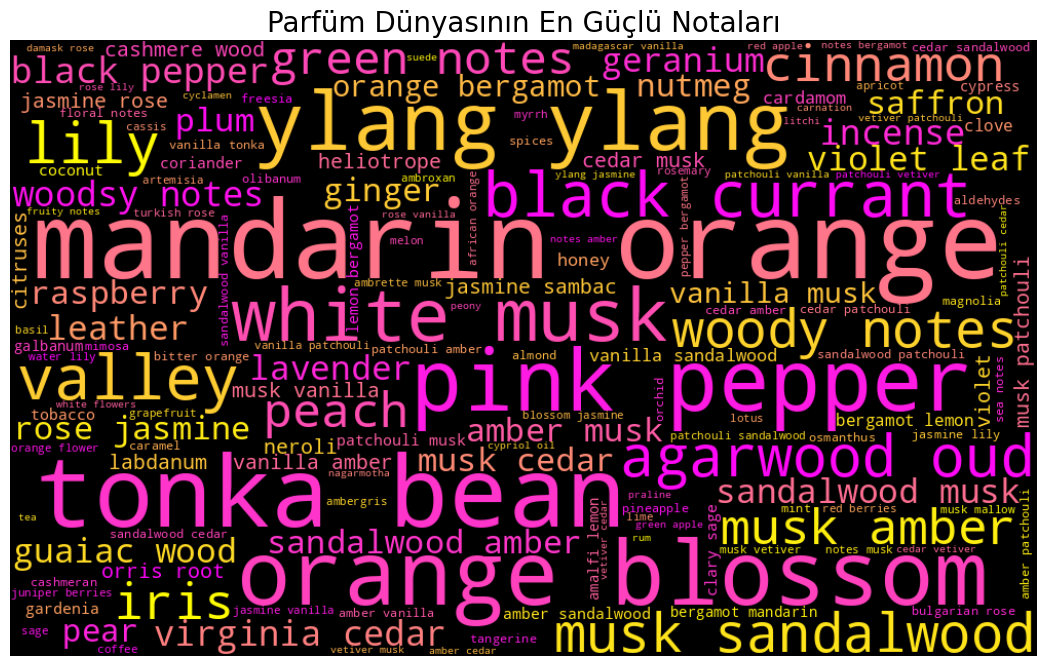

In [ ]:
# Gördüm durumu! Sütun listesine baktığımızda gizem çözüldü: Veri setinde aslında description (açıklama) diye bir sütun hiç yokmuş! 😂
# Görünüşe göre bu veri seti sadece teknik özelliklere odaklanmış (Notalar, Yıllar, Puanlar vb.). Ama üzülme, bir veri bilimci asla pes etmez; elimizdeki malzemeyle en iyi "Text Mining"i yine yaparız!
# 🎯 Yeni Strateji: "Nota Madenciliği"
# Madem uzun cümleler yok, biz de parfümlerin ruhunu oluşturan top (üst), middle (orta) ve base (alt) notalarını birer "metin" gibi okuyup analiz ederiz. Hangi notalar birbirini daha çok seviyor? Hangi nota "başrol oyuncusu"?
# Hadi, az önceki Kelime Bulutu (Word Cloud) kodunu bu koku notalarına göre güncelleyelim:
# 1. Tüm notaları tek bir metin havuzunda birleştiriyoruz
all_notes_text = df['top'].fillna('') + " " + df['middle'].fillna('') + " " + df['base'].fillna('')
all_notes_text = " ".join(all_notes_text.astype(str))

# 2. Kelime bulutunu oluştur (Notalar için)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1000, height=600,
                      background_color='black', # Siyah arka plan daha şık durur
                      colormap='spring', # Bahar renkleri: Notalara yakışır
                      min_font_size=10).generate(all_notes_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Parfüm Dünyasının En Güçlü Notaları", fontsize=20)
plt.show()

In [ ]:
# 🧐 Neye Bakıyoruz?
# Bu bulutta hangi kelime en büyükse, 24 bin parfümün içinde en çok o kullanılmış demektir. Muhtemelen "Musk", "Vanilla" veya "Bergamot" dev gibi çıkacak.
# 🎬 Şubat Ayı Hazırlığı: Power BI İçin Veri Kaydetme
# Bugünü kapatmadan önce, bu temizlediğimiz ve analiz ettiğimiz 24 bin satırlık dev veriyi tek bir temiz CSV olarak kaydedelim. Böylece Şubat ayında Power BI'ı açtığımızda "Sütun nerede? Hata nerede?" diye uğraşmadan şıkır şıkır raporlarımızı oluştururuz.
# Şu kodu çalıştırıp dosyayı bilgisayarına indir veya Colab'da sakla:
# En temiz halini kaydediyoruz
df.to_csv('parfum_verisi_final.csv', index=False)
print("✅ Şubat ayına hazırız! 'parfum_verisi_final.csv' başarıyla oluşturuldu.")


✅ Şubat ayına hazırız! 'parfum_verisi_final.csv' başarıyla oluşturuldu.


In [ ]:
## Sonuç & Öğrendiklerim:
# -Metin Temizliği (Preprocessing).
# -Kelime Bulutu (Word Cloud) oluşturma.
# -Learned about kategoride olmayan kelimelerden data çıkmaz.

# - Çalışma logu: 16:00 da başladım
# -Süre: 60 dk
# -Tarih: 30.01.2026
# -Ruh hali: Beynim Zonkluyor-Bulutsuzluk Özlemi :)
# -1 küçük zafer: Word Cloud Yapmak Çok Havalı